In [2]:
#import libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read the dataset in csv format 
df = pd.read_csv('house_pricing_dataset.csv')

#check for data values in the dataset
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


Question 1: show the distribution of house prices

In [4]:
#step 1: check the datatype of variable of interest; price

df['price'].info

<bound method Series.info of 0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64>

In [5]:
#step2: for analysis purpose, convert price datatype to integer.

df['price'] = df['price'].astype(int)
df['price'].info

<bound method Series.info of 0        313000
1       2384000
2        342000
3        420000
4        550000
         ...   
4595     308166
4596     534333
4597     416904
4598     203400
4599     220600
Name: price, Length: 4600, dtype: int32>

In [6]:
#step3: Get the 5 number summary

five_num = np.percentile(df['price'], [0, 25, 50, 75, 100])
five_num

array([       0. ,   322875. ,   460943. ,   654962.5, 26590000. ])

In [7]:
#step4: create bin edges & labels for the histogram

bin_edges = [0, 322875, 460943, 654962, 26590000, np.inf]
bin_labels = ['cheap', 'affordable', 'moderately_high', 'expensive', 'extremely_expensive']

In [8]:
#step5: create a new column named home price ranges

df['homeprice_ranges'] = pd.cut(df['price'], bin_edges, labels=bin_labels)
df['homeprice_ranges'].head(3)

0         cheap
1     expensive
2    affordable
Name: homeprice_ranges, dtype: category
Categories (5, object): ['cheap' < 'affordable' < 'moderately_high' < 'expensive' < 'extremely_expensive']

In [9]:
#step 6: check for any null values in the newly created column

df['price'], df['homeprice_ranges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4600 entries, 0 to 4599
Series name: homeprice_ranges
Non-Null Count  Dtype   
--------------  -----   
4551 non-null   category
dtypes: category(1)
memory usage: 4.8 KB


(0        313000
 1       2384000
 2        342000
 3        420000
 4        550000
          ...   
 4595     308166
 4596     534333
 4597     416904
 4598     203400
 4599     220600
 Name: price, Length: 4600, dtype: int32,
 None)

In [10]:
#step7: drop all null values in our dataset
df = df.dropna()

In [11]:
#step8: check if all null values have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   date              4551 non-null   object  
 1   price             4551 non-null   int32   
 2   bedrooms          4551 non-null   float64 
 3   bathrooms         4551 non-null   float64 
 4   sqft_living       4551 non-null   int64   
 5   sqft_lot          4551 non-null   int64   
 6   floors            4551 non-null   float64 
 7   waterfront        4551 non-null   int64   
 8   view              4551 non-null   int64   
 9   condition         4551 non-null   int64   
 10  sqft_above        4551 non-null   int64   
 11  sqft_basement     4551 non-null   int64   
 12  yr_built          4551 non-null   int64   
 13  yr_renovated      4551 non-null   int64   
 14  street            4551 non-null   object  
 15  city              4551 non-null   object  
 16  statezip          4551 n

In [12]:
#step9: for analysis purpose, convert the home price ranges datatype to string

df['homeprice_ranges'] = df['homeprice_ranges'].astype(str)
df['homeprice_ranges'].tail(4)

4596    moderately_high
4597         affordable
4598              cheap
4599              cheap
Name: homeprice_ranges, dtype: object

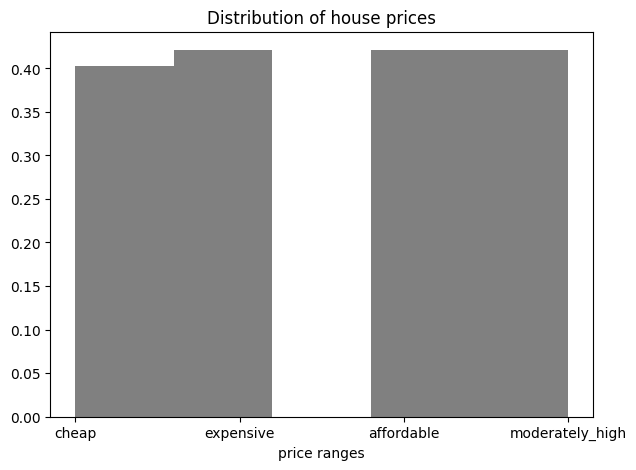

In [13]:
#step10: draw your chart to show distribution of house prices.

fig = plt.figure(figsize=(7,5))
plt.hist(df['homeprice_ranges'], density=True, color='grey',  bins=5)

plt.title('Distribution of house prices')
plt.xlabel('price ranges')
plt.show()

Question 2: show the distribution of average house prices across the top 10 cities

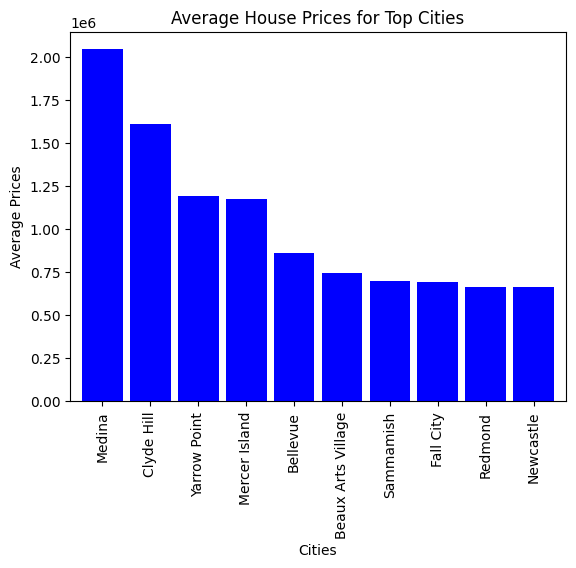

In [14]:
avg_house_price_df = df.groupby('city')['price'].mean().sort_values(ascending=False)
avg_prices = avg_house_price_df.head(10)

avg_prices.plot(kind='bar', width=0.85, color='blue')
plt.title('Average House Prices for Top Cities')

plt.xlabel('Cities')
plt.ylabel('Average Prices')
plt.show()

Question3: show trend of house prices from the earliest date to the latest date in the dataset.

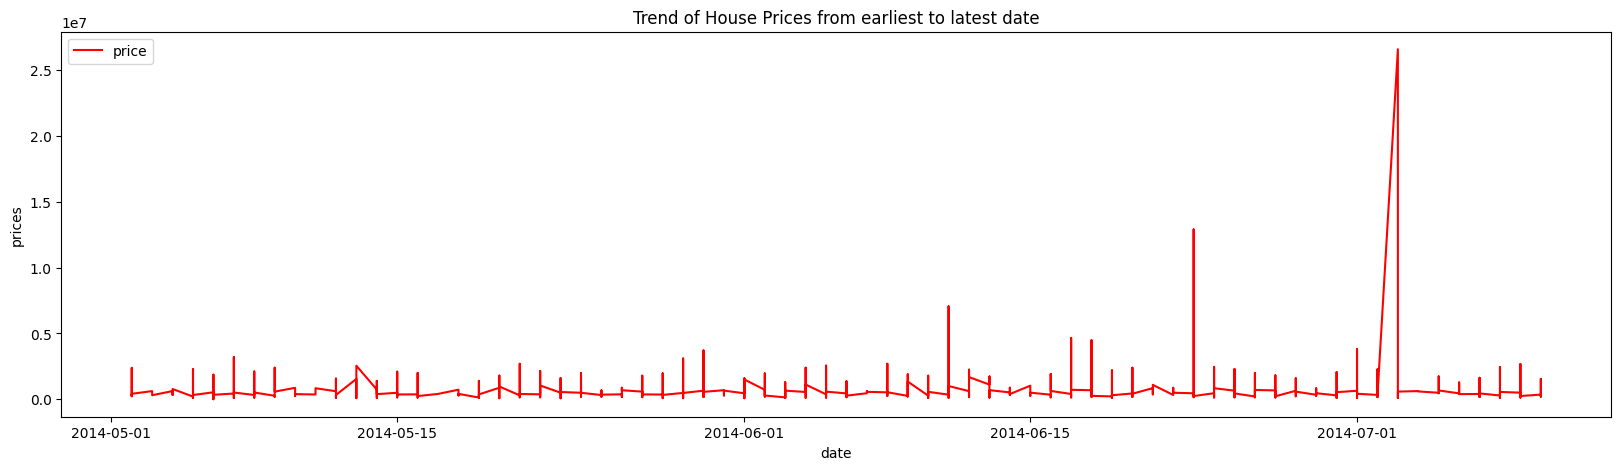

In [15]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.plot(x='date', y='price', color='red', figsize=(20,5))

plt.legend(loc = 'upper left')
plt.title('Trend of House Prices from earliest to latest date')

plt.xlabel("date")
plt.ylabel("prices")
plt.show()

Question4: Distribution of maximum bedroom size across the top 10 cities

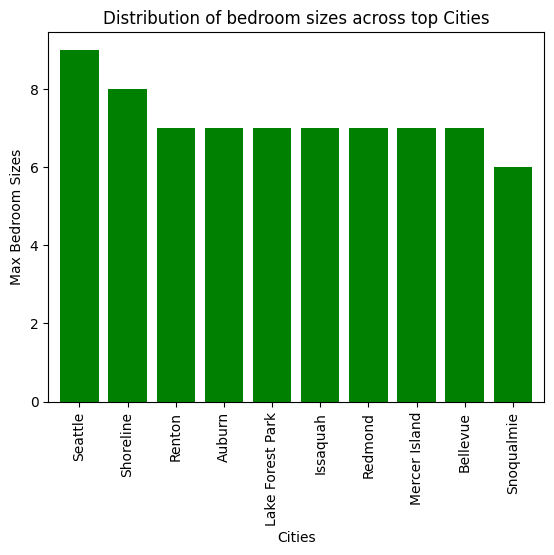

In [16]:
bed_df = df.groupby('city')['bedrooms'].max()
bed_df1 = bed_df.sort_values(ascending=False)
max_bedsizes = bed_df1.head(10)

max_bedsizes.plot(kind='bar', width=0.8, color='green')
plt.title('Distribution of bedroom sizes across top Cities')

plt.xlabel('Cities')
plt.ylabel('Max Bedroom Sizes')
plt.show()

Question5: Distribution of oldest houses across top 10 cities

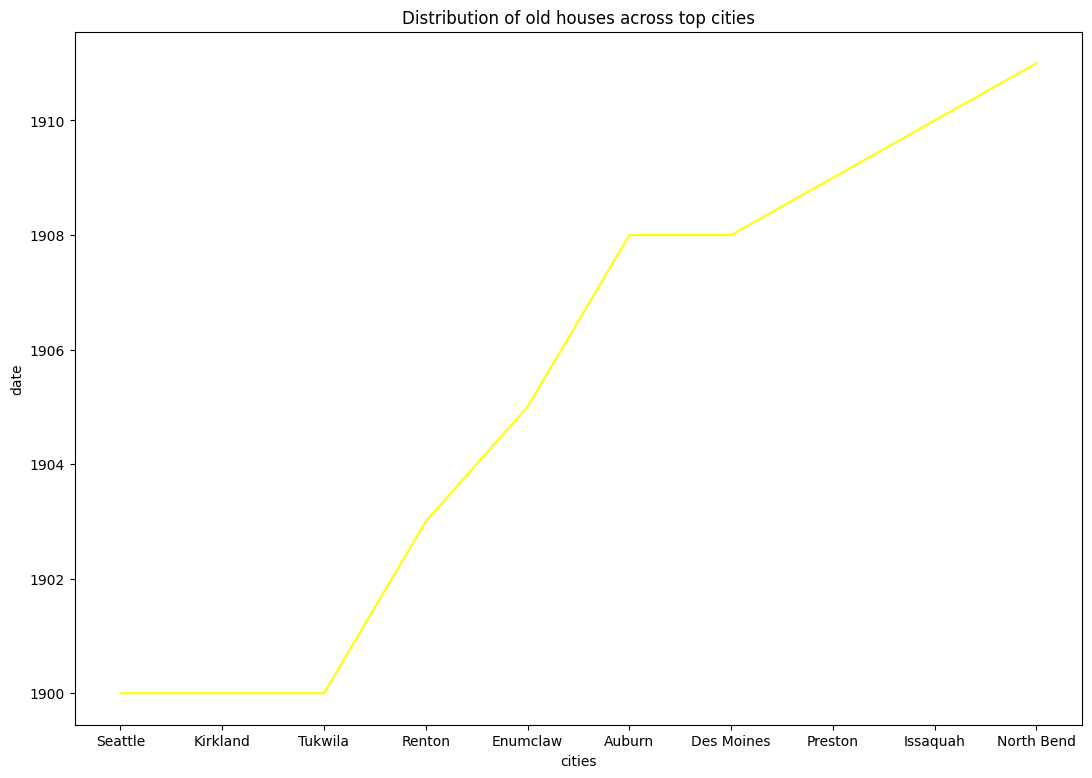

In [17]:
ax = plt.subplot()
house_df = df.groupby('city')['yr_built'].min()
house_df1 = house_df.sort_values(ascending=True)
old_houses = house_df1.head(10)

ax.set_xticks(np.arange(len(house_df1)))
old_houses.plot(x='city', y='yr_built', color='yellow', figsize=(13,9))

plt.title('Distribution of old houses across top cities')
plt.xlabel("cities")
plt.ylabel("date")
plt.show()

Question6: Distribution of the years the houses were last renovated

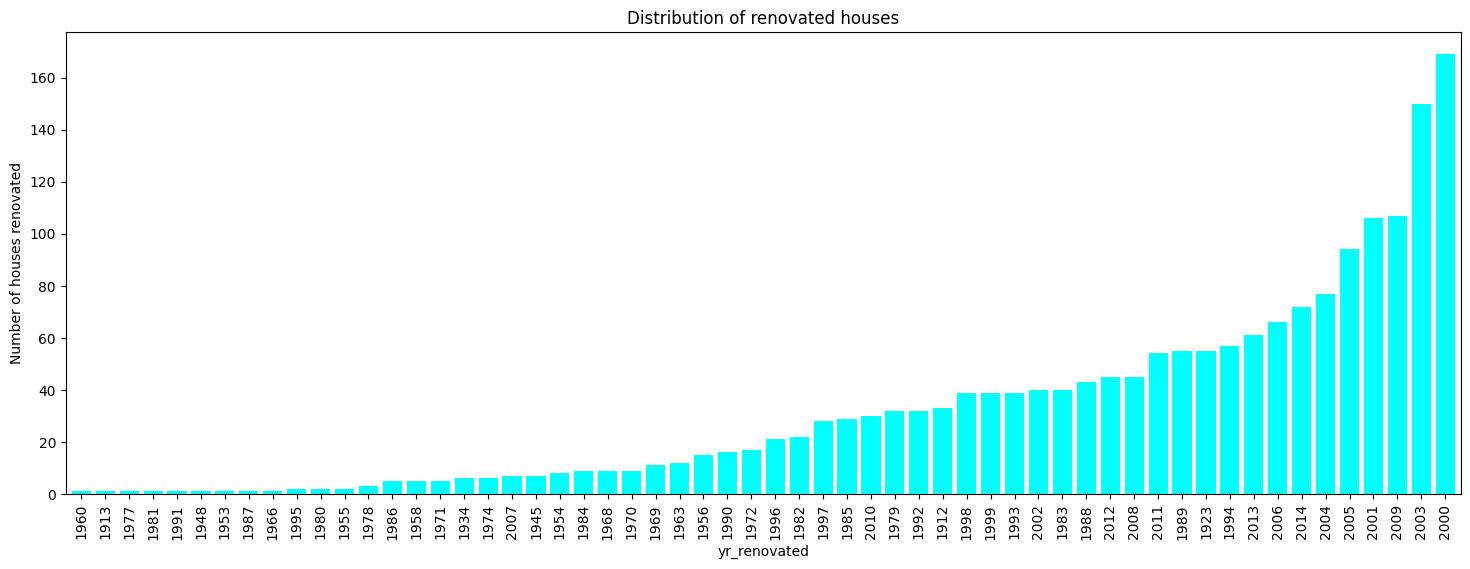

In [18]:
fig = plt.figure(figsize=(18,6))
new_houses = df.loc[df['yr_renovated']!=0]

df_newhouse = new_houses.groupby('yr_renovated')['yr_renovated'].count()
df1_newhouse = df_newhouse.sort_values(ascending=True)

df1_newhouse.plot(kind='bar', width=0.8, color='cyan', linewidth=1)
plt.title('Distribution of renovated houses')

plt.ylabel('Number of houses renovated')
plt.show()

Question7: Distribution of average basement square feets across top 10 cities

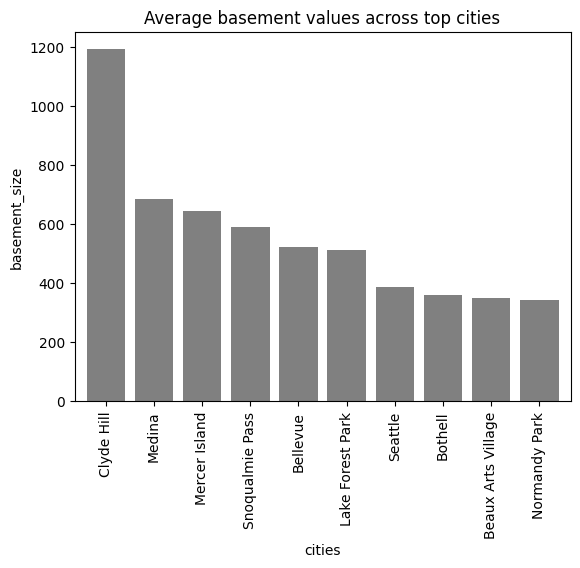

In [19]:
df_average_basement = df.groupby('city')['sqft_basement'].mean()
df1_average_basement = df_average_basement.sort_values(ascending=False)

df2_average_basement = df1_average_basement.head(10)
df2_average_basement.plot(kind='bar', width=0.8, color='grey', linewidth=1)

plt.title('Average basement values across top cities')
plt.xlabel("cities")
plt.ylabel("basement_size")
plt.show()

Question8: Relationship between prices and number of bedrooms

In [60]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['price'] = df['price'].astype(int)

prices = df['price']
bedrooms = df['bed_rooms']
plt.scatter(prices,bedrooms, color='green')

# df_bed_price = bed_rooms.groupby('bedrooms')['price'].mean()
# df_bed_price.plot(kind='bar', figsize=(12, 9), color="cyan", linewidth=0.5)

plt.xlabel('number_of_bedrooms')
plt.ylabel('average_prices')
plt.title('Relationship between Prices and number of Bedrooms')
plt.show()

KeyError: 'bed_rooms'

Question9: Relationship between number of bedrooms and year the house was built

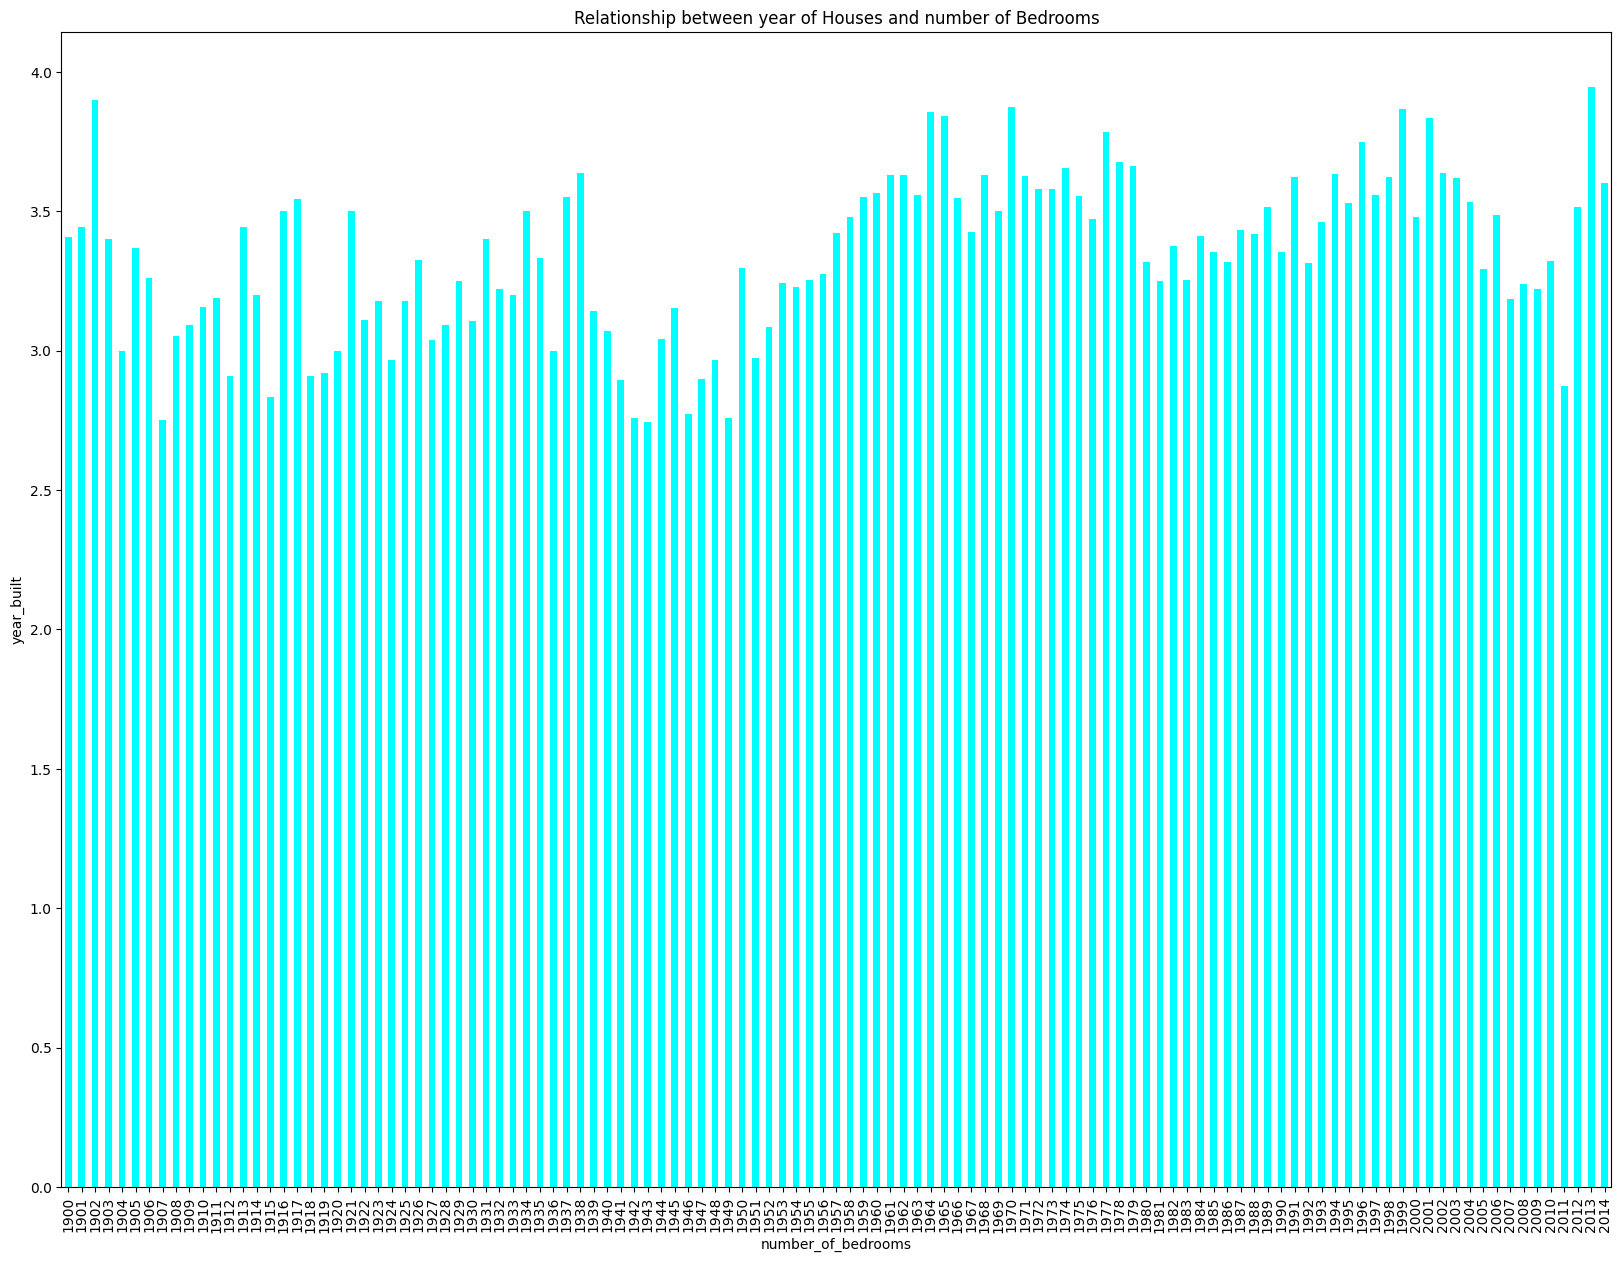

In [56]:
year = df.loc[df['yr_built']!=0]

df_bed_year = df.groupby('yr_built')['bedrooms'].mean()
df_bed_year.plot(kind='bar', figsize=(20, 15), color="cyan", linewidth=0.5)

plt.xlabel('number_of_bedrooms')
plt.ylabel('year_built')
plt.title('Relationship between year of Houses and number of Bedrooms')
plt.show()

In [54]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,homeprice_ranges
0,2014-05-02,313000,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,cheap
1,2014-05-02,2384000,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,expensive
